In [17]:
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np

$$ 4.2  x_1 + 10 x_2 = 136 $$
$$ -10.1 x_1 + 13.8 x_2 = 132 $$
$$ 18.3 x_1 - 7.6 x_2 = 108 $$

In [39]:
lines = np.array([
    [4.2, 10, 136],
    [-10.1, 13.8, 132],
    [18.3, -7.6, 108],
])

In [40]:
def get_x2(a1, a2, b, x1):
    return (a1 * x1 - b) / a2

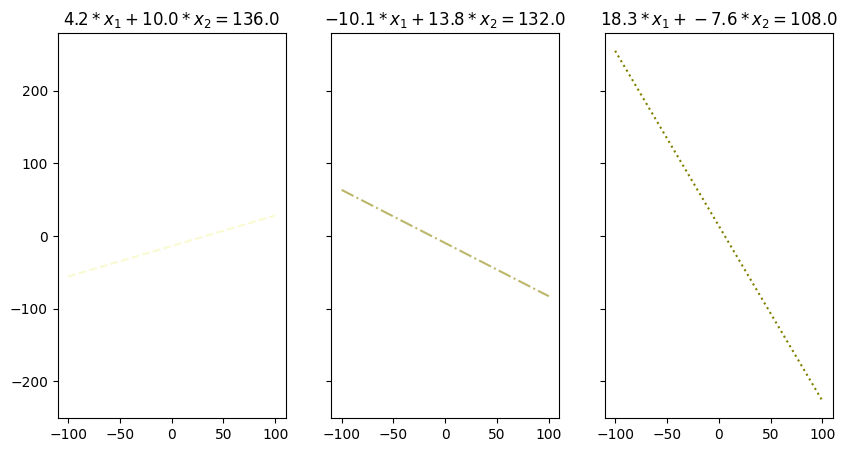

In [41]:
x = np.linspace(-100, 100)
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10, 5))
colors = ['lightgoldenrodyellow', 'darkkhaki', 'olive']
linestyles = ['dashed', 'dashdot', 'dotted']
for i in range(len(lines)):
    ax[i].plot(x, get_x2(*lines[i], x), color=colors[i], linestyle=linestyles[i])
    ax[i].set_title('${} * x_1 + {} * x_2 = {}$'.format(*lines[i]))
plt.show()

In [42]:
intersections = np.array([np.linalg.solve(lines[:, :-1][list(i)], lines[:, -1][list(i)]) for i in combinations(range(len(lines)), 2)])
intersections

array([[ 3.50276799, 12.12883744],
       [ 9.83435697,  9.46957007],
       [14.18591421, 19.94766185]])

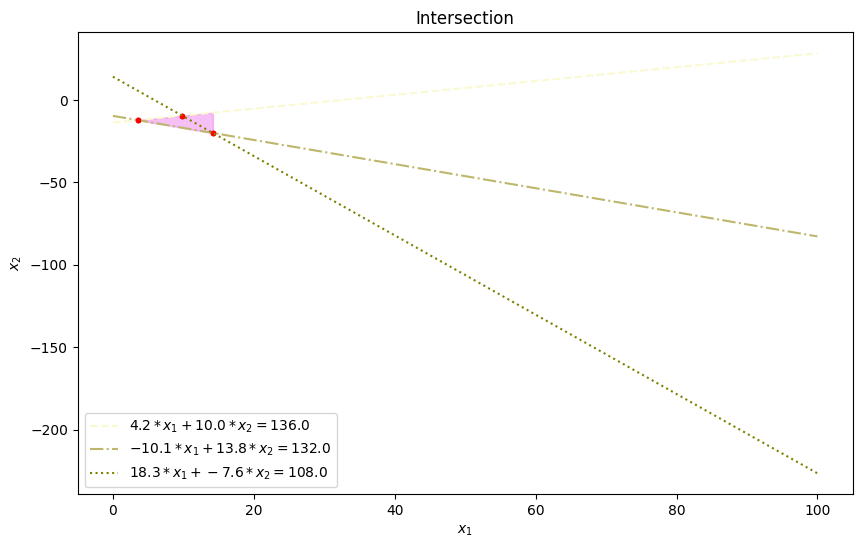

In [45]:
def plot_():
    figure = plt.figure(figsize=(10, 6))
    x = np.linspace(0, 100)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title('Intersection')
    colors = ['lightgoldenrodyellow', 'darkkhaki', 'olive']
    linestyles = ['dashed', 'dashdot', 'dotted']
    for i in range(len(lines)):
        plt.plot(intersections[:, 0], -intersections[:, 1], '.r')
        plt.plot(x, get_x2(*lines[i], x), color=colors[i], linestyle=linestyles[i],
                 label='${} * x_1 + {} * x_2 = {}$'.format(*lines[i]))

    X = np.linspace(intersections[:, 0].min(), intersections[:, 0].max())
    plt.fill_between(X, get_x2(*lines[0], X),
                     np.min([get_x2(*lines[1], X), get_x2(*lines[2], X)], axis=0),
                     color='violet',
                     alpha=0.5)
    plt.legend()
    return figure


figure = plot_()

In [46]:
figure.savefig('result.svg')
figure.savefig('result.jpg')
figure.savefig('result.png')